<a href="https://colab.research.google.com/github/Willlee0225/nbviewer/blob/master/%E5%AF%A6%E4%BD%9CRNN%E9%A0%90%E6%B8%AC%E8%82%A1%E5%83%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 這次利用ＲＮＮ中的ＬＳＴＭ，藉由道瓊過去的走勢來預測下一天的走勢

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
%tensorflow_version 2.x

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['data3.csv']))

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test3.csv to test3.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['test3.csv']))

## 標準化資料

In [0]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))

In [0]:
train_set = df1['DOW']
test_set = df2['DOW']

In [0]:
train_set= train_set.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)

## 以10天當作一個序列來做預測

In [0]:
X_train = [] 
y_train = []
for i in range(10,len(train_set)):
    X_train.append(training_set_scaled[i-10:i-1, 0]) 
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train, 
                         (X_train.shape[0], X_train.shape[1], 1))

## 建立模型

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,BatchNormalization

Using TensorFlow backend.


In [0]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/20
5990/5990 [==============================] - 43s 7ms/step - loss: 0.0017
Epoch 2/20
5990/5990 [==============================] - 43s 7ms/step - loss: 2.6403e-04
Epoch 3/20
5990/5990 [==============================] - 43s 7ms/step - loss: 2.6920e-04
Epoch 4/20
5990/5990 [==============================] - 42s 7ms/step - loss: 2.5440e-04
Epoch 5/20
5990/5990 [==============================] - 46s 8ms/step - loss: 2.1008e-04
Epoch 6/20
5990/5990 [==============================] - 46s 8ms/step - loss: 1.8080e-04
Epoch 7/20
5990/5990 [==============================] - 42s 7ms/step - loss: 1.7829e-04
Epoch 8/20
5990/5990 [==============================] - 42s 7ms/step - loss: 1.6967e-04
Epoch 9/20
5990/5990 [==============================] - 42s 7ms/step - loss: 1.5233e-04
Epoch 10/20
5990/5990 [==============================] - 42s 7ms/step - loss: 1.4560e-04
Epoch 11/20
5990/5990 [==============================] - 41s 7ms/step - loss: 1.4913e-04
Epoch 12/20
5990/5990 [===========

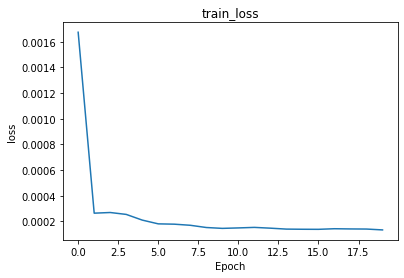

In [0]:
history = regressor.fit(X_train, y_train, epochs = 20, batch_size = 5)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [0]:
dataset_total = pd.concat((df1['DOW'], df2['DOW']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df2) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

## 畫出實際＆預測的圖形

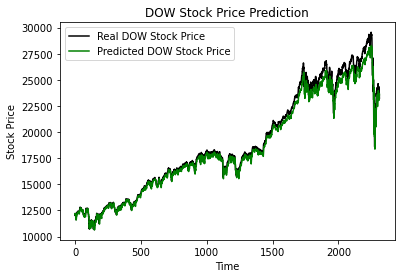

In [0]:
plt.plot(df2['DOW'].values, color = 'black', label = 'Real DOW Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted DOW Stock Price')
plt.title('DOW Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')